In [1]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load CSV data
file_path = 'ANN MAAM\\ANN_data.csv'  # replace with the actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Features (input variables) and Target (output variable - Id)
X = data[['Thickness', 'Al_Mole_Fraction', 'In_Mole_Fraction', 'Vd', 'Threshold_Voltage_Vth', 'Vg']]
y = data['Id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


   Thickness  Al_Mole_Fraction  In_Mole_Fraction  Vd  Threshold_Voltage_Vth  \
0       11.3              0.83              0.13   6                   -4.8   
1       11.3              0.83              0.13   6                   -4.8   
2       11.3              0.83              0.13   6                   -4.8   
3       11.3              0.83              0.13   6                   -4.8   
4       11.3              0.83              0.13   6                   -4.8   

    Vg     Id  
0  3.0  2.100  
1  2.0  2.090  
2  1.0  2.001  
3  0.0  1.900  
4 -1.0  1.650  


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Build the Ridge Neural Network model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))

# Hidden layer
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))

# Output layer (since we are predicting a continuous value, no activation function needed here)
model.add(Dense(1, activation='linear'))

# Compile the model (using Mean Squared Error for regression)
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, verbose=1)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - loss: 0.5038 - val_loss: 0.8415
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3791 - val_loss: 0.6664
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3371 - val_loss: 0.5309
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2466 - val_loss: 0.4287
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1893 - val_loss: 0.3578
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1819 - val_loss: 0.3006
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1640 - val_loss: 0.2526
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1327 - val_loss: 0.2112
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1320 - val_loss: 0.1767
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1200 - val_loss: 0.1501
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1178 - val_loss: 0.1299
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1067 - val_l

Epoch 70/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0427 - val_loss: 0.0471
Epoch 71/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0427 - val_loss: 0.0470
Epoch 72/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0425 - val_loss: 0.0469
Epoch 73/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0419 - val_loss: 0.0467
Epoch 74/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0421 - val_loss: 0.0466
Epoch 75/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0418 - val_loss: 0.0464
Epoch 76/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0418 - val_loss: 0.0462
Epoch 77/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0414 - val_loss: 0.0461
Epoch 78/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0415 - val_loss: 0.0460
Epoch 79/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0413 - val_loss: 0.0460
Epoch 80/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0411 - val_loss: 0.0459
Epoch 81/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0411

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


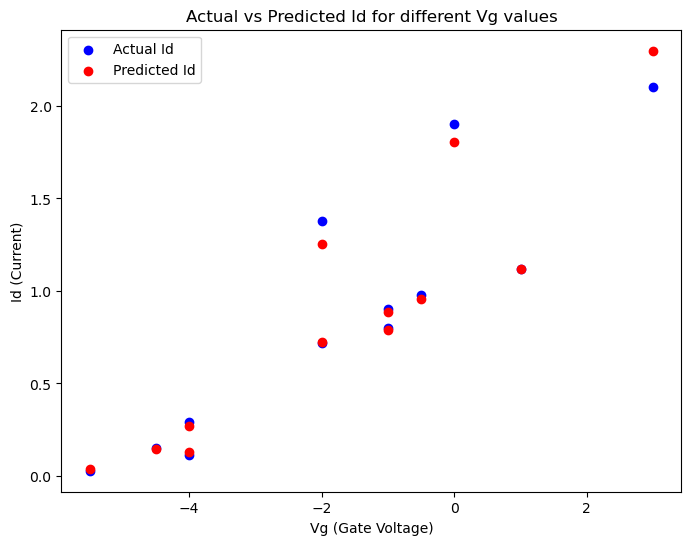

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the output on the test set
y_pred = model.predict(X_test_scaled)

# Plot the relationship between Vg and the predicted Id
plt.figure(figsize=(8,6))
plt.scatter(X_test['Vg'], y_test, color='blue', label='Actual Id')
plt.scatter(X_test['Vg'], y_pred, color='red', label='Predicted Id')
plt.xlabel('Vg (Gate Voltage)')
plt.ylabel('Id (Current)')
plt.title('Actual vs Predicted Id for different Vg values')
plt.legend()
plt.show()


In [9]:
# Function to make predictions with new inputs
def predict_current(new_data):
    # Assume new_data is a dictionary with the input features
    new_df = pd.DataFrame(new_data, index=[0])
    
    # Scale the input data
    new_data_scaled = scaler.transform(new_df)
    
    # Predict using the trained model
    predicted_Id = model.predict(new_data_scaled)
    return predicted_Id[0][0]

# Example usage of the function
new_input = {
    'Thickness': 11.3,
    'Al_Mole_Fraction': 0.66,
    'In_Mole_Fraction': 0.14,
    'Vd': 10,
    'Threshold_Voltage_Vth': -3.4,
    'Vg': -4.5
}

predicted_Id = predict_current(new_input)
print(f'Predicted Id (Current) for the new inputs: {predicted_Id}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Id (Current) for the new inputs: 0.07022704929113388
